## Problem 1: Visualise data in a static map (10 points)


Create a *static* **thematic map** using the skills you learnt during lesson 5. The map should <br>
contain more than one layer (from at least two different data sets). Pay attention to classification <br>
and visualisation (appropriate colour scheme choice, etc.). Write your code in this notebook, and <br>
store the resulting maps in `.png` format in the `NOTEBOOK_DIRECTORY / "docs"` folder.

### Topic of the map

- Use any of the data sets we have used during the course (travel time data, population grid), or <br>
  any other data set of your interest (for example, [open data sets from Statistics Finland](https://www.stat.fi/org/avoindata/index_en.html), <br>
  or the open geo-data from [the Helsinki Region Infoshare](https://hri.fi/en)). If you download <br>
  data sets, add, commit, and push them to the `DATA_DIRECTORY`. Be sure to include an attribution <br>
  to each data set in your output map!
- Feel free to start from and adapt examples from the course material! You can take one step further <br>
  and add additional analysis to, e.g., the shopping centre dominance or the population within vincinity <br>
  of certain addresses)

### Criteria

- The map has more than one data layer (for instance, the results of an analysis, and the road network <br>
  to illustrate a complex spatial pattern). If (and only if) you think it adds additional value, feel <br>
  free to add a base map (but a base map does not count as an own layer) (2 points)
- The map portrays the output of an analysis or a classification that adds value beyond just displaying <br>
  the raw data (3 points)
- The map follows good cartographic practices (appropriate map extent and zoom level, colour scheme, <br>
  legend and data sources, etc.) (5 points)

### Output

- Save the map(s) in `.png` format in the `NOTEBOOK_DIRECTORY / "docs"` folder, remember to add, commit, <br>
  and push them to the GitHub repository
- Remember to also add, commit, and push input data sets and code

---

In [152]:
import pathlib 
NOTEBOOK_PATH = pathlib.Path().resolve()
DATA_DIRECTORY = NOTEBOOK_PATH / 'data'
OUTPUT_DIRECTORY = NOTEBOOK_PATH / 'docs'


In [163]:
import geopandas
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import requests

url = (
    'https://kartta.hel.fi/ws/geoserver/avoindata/wfs'
    '?service=wfs'
    '&version=2.0.0'
    '&request=GetFeature'
    '&srsName=EPSG:3879'
    '&typeName=avoindata:Seutukartta_aluejako_kuntarajat'
    '&outputFormat=GML2'
)

response = requests.get(url)
save_path = DATA_DIRECTORY / 'grid_data.gml'
with open(save_path, 'wb') as f:
    f.write(response.content)

grid = geopandas.read_file(DATA_DIRECTORY / 'grid_data.gml')
built_areas = geopandas.read_file (DATA_DIRECTORY / 'Seutukartta_maankaytto_rakennetut_alueet.xml')

helsinki_grid = grid[grid['nimi'] == 'Helsinki']
helsinki_grid.crs = 'EPSG:3879'
grid.crs = 'EPSG:3879'
built_areas.crs = 'EPSG:3879'
built_areas = geopandas.sjoin(built_areas, helsinki_grid, how='inner', op='intersects')
grid.head()



C:\Users\Jani\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,gml_id,tietopalvelu_id,kunta,nimi,nimi_r,mtryhm,geometry
0,Seutukartta_aluejako_kuntarajat.1,1,235,Kauniainen,Grankulla,50,"POLYGON ((25482859.111 6678577.129, 25482951.6..."
1,Seutukartta_aluejako_kuntarajat.2,2,505,Mäntsälä,Mäntsälä,50,"POLYGON ((25524139.255 6729120.263, 25523246.8..."
2,Seutukartta_aluejako_kuntarajat.3,3,091,Helsinki,Helsingfors,50,"POLYGON ((25514074.174 6686992.453, 25513984.5..."
3,Seutukartta_aluejako_kuntarajat.4,4,049,Espoo,Esbo,50,"POLYGON ((25496789.780 6645441.247, 25494573.3..."
4,Seutukartta_aluejako_kuntarajat.5,5,753,Sipoo,Sibbo,50,"POLYGON ((25529166.127 6683742.885, 25529165.6..."


In [164]:
import geopandas

train_stations = geopandas.read_file(DATA_DIRECTORY / 'Seutukartta_liikenne_juna_asema.xml')
train_stations.crs = 'EPSG:3879'
assert grid.crs == train_stations.crs

helsinki_train_stations = [
    'Helsinki',           
    'Pasila',             
    'Oulunkylä',          
    'Huopalahti',    
    'Käpylä',          
    'Ilmala",         
    'Valimo",    
    'Pitäjänmäki", 
    'Malmi',              
    'Tapanila',   
    'Puistola',       
    'Pukinmäki'   
]
train_stations_helsinki = train_stations[train_stations['asemapaikka'].isin(helsinki_train_stations)]
train_stations_helsinki.crs = 'EPSG:3879'
assert grid.crs == train_stations_helsinki.crs


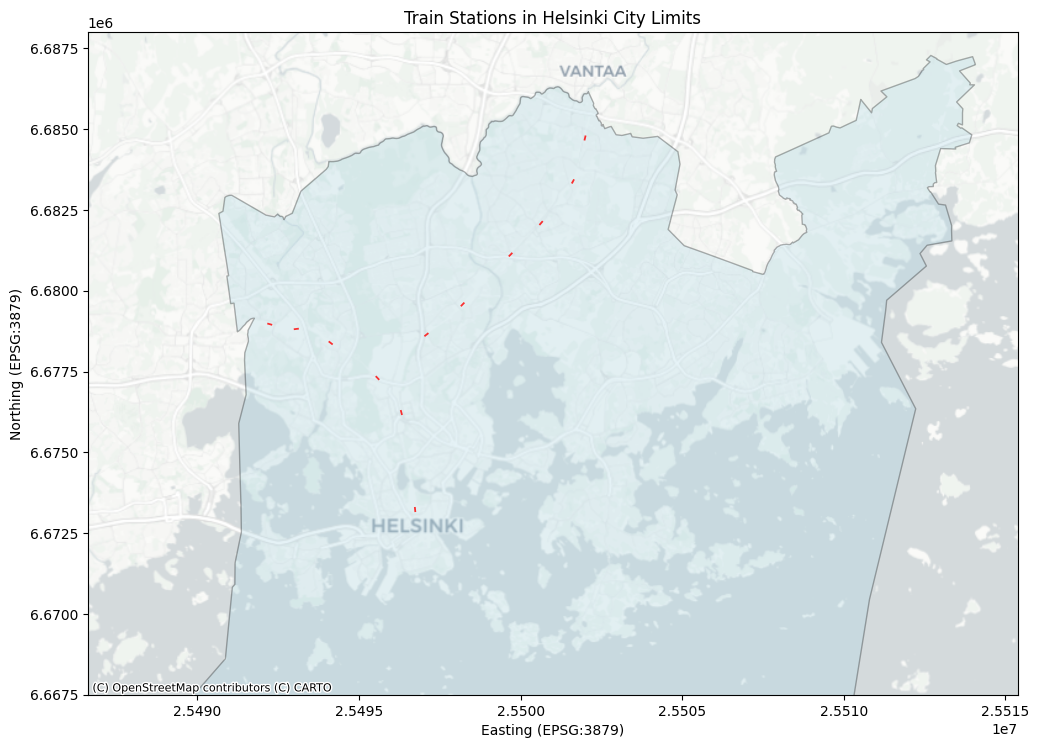

In [165]:
import matplotlib.pyplot as plt
import contextily as ctx

fig, ax = plt.subplots(figsize=(12, 12))
output_file = OUTPUT_DIRECTORY / 'train_stations.png'
# plot H
helsinki_grid.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.3, linewidth=1)
train_stations_helsinki.plot(ax=ax, color='red', markersize=20, alpha=0.8)
ctx.add_basemap(ax, crs=helsinki_grid.crs.to_string(), source=ctx.providers.CartoDB.Positron)
# title and labels
ax.set_title('Train Stations in Helsinki City Limits')
ax.set_xlabel('Easting (EPSG:3879)')
ax.set_ylabel('Northing (EPSG:3879)')
ax.set_ylim(6667500, 6688000) 

plt.savefig(output_file, format='png', dpi=300)
plt.show()


C:\Users\Jani\AppData\Local\Temp\ipykernel_14912\3273828923.py:20: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


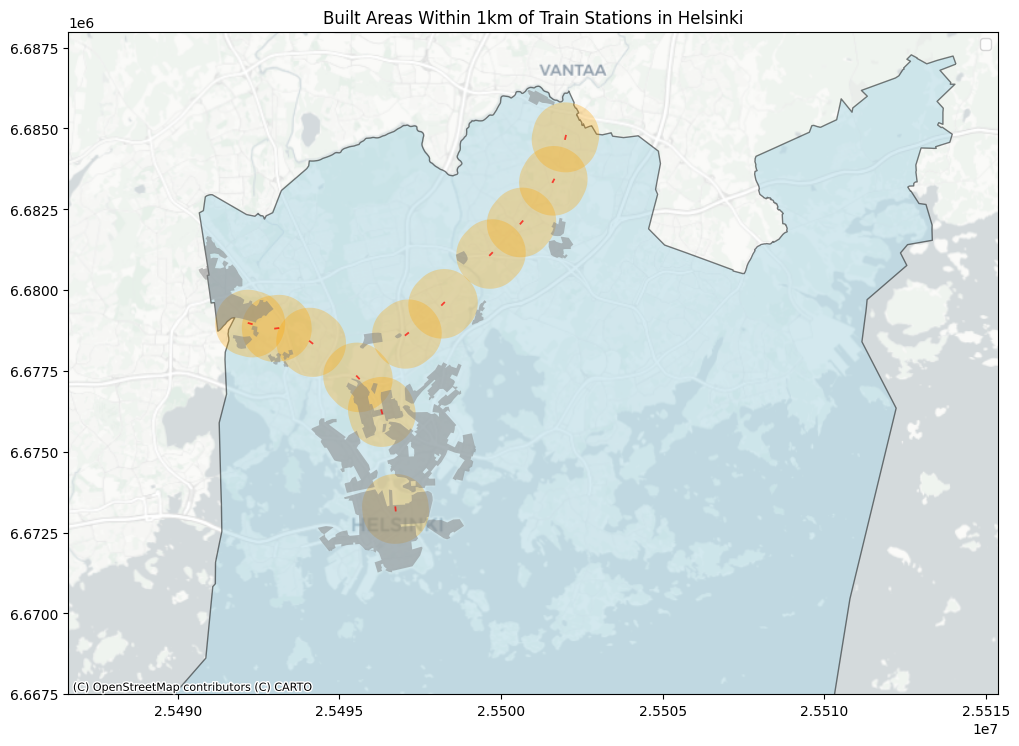

In [154]:
buffer_radius = 1000  # 1km buffer
train_stations_with_buffer = train_stations_helsinki.copy()
train_stations_with_buffer['geometry'] = train_stations_with_buffer.buffer(buffer_radius)

output_file = OUTPUT_DIRECTORY / 'train_station_proximity_map.png'

# filter built areas
built_areas_within_buffer = built_areas[built_areas.intersects(train_stations_with_buffer.unary_union)]

# plot
fig, ax = plt.subplots(figsize=(12, 12))
helsinki_grid.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.5, label='Helsinki City Boundary')
train_stations_with_buffer.plot(ax=ax, color='orange', alpha=0.3, label='Buffer Zones (1km)')
built_areas_within_buffer.plot(ax=ax, color='grey', alpha=0.5, label='Built Areas within 1km of Stations')
train_stations_helsinki.plot(ax=ax, color='red', markersize=10, alpha=0.7, label='Train Stations')

ctx.add_basemap(ax, crs=helsinki_grid.crs.to_string(), source=ctx.providers.CartoDB.Positron)
ax.set_ylim(6667500, 6688000) 
ax.set_title('Built Areas Within 1km of Train Stations in Helsinki')
ax.legend()

plt.savefig(output_file, format='png', dpi=300)
plt.show()
